Prompts suggested by GPT-4:

Sure, here are 10 potential prompts that can be used to create Anki flashcards from any given text:

1. "Generate Anki flashcards from this text:"
2. "Formulate Anki flashcards using this content:"
3. "Create Anki flashcards based on the following information:"
4. "Design Anki flashcards from the given text:"
5. "Produce Anki flashcards using this passage:"
6. "Craft Anki flashcards from the following details:"
7. "Construct Anki flashcards using these facts:"
8. "Develop Anki flashcards based on this data:"
9. "Create Anki flashcards from these key points:"
10. "Generate Anki flashcards using these concepts:"

Each of these prompts can be followed by the text you want to turn into flashcards. The flashcards can then be imported into the Anki app for studying.

In [ ]:
from langchain import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.chains import SimpleSequentialChain
import pandas as pd
import openai
import json

What are we aiming for with these prompts?

1. Completeness
2. Accuracy (factual flashcards)
3. Relevancy
4. Specificity
5. Coherence?
6. Avoid duplication!

The steps to create the dataset will be:

1. Fetch a random paper from arxiv in the fields of: machine learning, AI, nlp, computer vision etc.
2. Select a random page from that paper
3. Extract all the facts for that page
4. Create anki flashcards for each of the facts extracted
5. Output the result

In [ ]:
# Saves the output from the prompt engineering experiments to a JSON file
def save_output(text_input, prompt_candidates, output, model, approach):
    data = {
        "text_input": text_input,
        "prompt_candidates": prompt_candidates,
        "output": output,
        "model": model,
        "approach": approach
    }

    with open('output.json', 'a') as file:
        json.dump(data, file)
        file.write('\n')

In [ ]:
# the google article can be found here: https://blog.google/technology/ai/google-palm-2-ai-large-language-model/
# Loading the necessary article
with open("./articles/google_palm2_article.txt", "r") as f:
    google_palm_article = f.read()

In [ ]:
# Running individual chain
def run_chain(llm, prompt_candidate, text):
    chain_chatgpt = LLMChain(llm=llm, prompt=prompt_candidate)
    output = chain_chatgpt.run(text)
    return output

In [ ]:
# Creating a bunch of templates for the prompt engineering experiments to create a list of facts from an article
templates = ["""Create a list with all the facts contained in this article: {article}""",
             """Create a list with all the facts contained in this article: {article}. Let's think step by step.""",
             """Let's break down the information in this article, {article}, and compile a comprehensive list of facts.""",
             """We should systematically analyze {article} and create a detailed list of all the factual points.""",
             """Taking a methodical approach, let's extract and organize all the factual details from {article} into a list.""",
             """Our objective is to create an itemized compilation of all the factual information presented in {article}.""",
             """With a step-by-step mindset, let's generate a comprehensive list that encompasses all the facts from {article}.""",
             """By carefully examining {article} and thinking methodically, we can construct a detailed list of all the facts.""",
             """Let's embark on a systematic journey of extracting all the factual data from {article} and assembling it into a list.""",
             """Our task is to create an all-inclusive list that encompasses every factual element found in {article} by following a logical sequence.""",
             """By analyzing {article} thoroughly, we can compile an exhaustive list that covers all the factual aspects.""",
             """We need to go through {article} meticulously and compose a step-by-step list that includes all the relevant facts.""",
             """Let's methodically go through {article} and generate a list that encompasses all the factual details.""",
             """Our aim is to meticulously examine {article} and create a comprehensive list containing all the factual information.""",
             """By closely scrutinizing {article}, we can extract and organize all the factual points into a step-by-step list.""",
             """Let's carefully dissect {article} and assemble a list that outlines every single factual aspect.""",
             """Our goal is to systematically analyze {article} and compile a comprehensive list of all the facts it presents.""",
             """By approaching {article} in a step-by-step manner, we can construct a detailed list that covers all the factual content.""",
             """Let's think critically and methodically as we create a list that encapsulates all the factual information from {article}.""",
             """Our objective is to extract and organize all the factual data from {article} into a step-by-step list.""",
             """By employing a systematic approach, let's create a comprehensive list that captures all the factual details presented in {article}.""",
             """Let's thoughtfully examine {article} and create a meticulously organized list that includes every factual point."""]

prompt_candidates = [PromptTemplate(
    input_variables=["article"],
    template=template,
) for template in templates]

In [ ]:
max_length = max([len(template.template) for template in prompt_candidates])
llm = OpenAI(temperature=0.0, max_tokens=4097-(max_length+ len(google_palm_article))/4)

In [ ]:
# Save it to a csv table with the following columns: text_input, prompt candidates, output, model, approach (like zero shot or few shot etc...)
for prompt_candidate in prompt_candidates:
    output = run_chain(llm, prompt_candidate, google_palm_article)
    save_output(google_palm_article, prompt_candidate.template, output, "ChatGPT-3.5-Turbo", "Zero-Shot")

In [ ]:
# Now let's compare each output from the models to a baseline output saved in the gpt4_baseline_output.txt
# We'll loop over the output results saved in the output.json file and compare it to our baseline asking CHatGPT itself to give that comparison a score between 0 and 100 (measuring it for completeness, accuracy, relevance, etc...)
# We'll save the results in a csv table with the following columns: text_input, prompt candidates, output, model, approach (like zero shot or few shot etc...), score
def load_json(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            data.append(json.loads(line))

    return data

filename = './output.json'
data = load_json(filename)

In [ ]:
with open("./gpt4_baseline_output.txt", "r") as f:
    gpt4_baseline_answer = f.read()

gpt4_baseline_answer

'1. Over the last decade, Google has led numerous breakthroughs in AI, particularly in the development of foundation models.\n2. These AI technologies have found diverse applications, including healthcare and human creativity.\n3. Scaling up neural networks has allowed for significant advancements, but "bigger is not always better"; research creativity plays a significant role in building effective models.\n4. Advances in model architecture and training have allowed for multimodality, human feedback loops, and more efficient model construction.\n5. Google is introducing PaLM 2, the next generation language model.\n6. PaLM 2 features improved multilingual, reasoning, and coding capabilities.\n7. PaLM 2 is trained on text spanning more than 100 languages, improving its capacity to understand, generate, and translate nuanced text across a variety of languages.\n8. PaLM 2\'s dataset includes scientific papers and web pages with mathematical expressions, boosting its capabilities in logic, 

GPT4 baseline output:
'1. Over the last decade, Google has led numerous breakthroughs in AI, particularly in the development of foundation models.\n2. These AI technologies have found diverse applications, including healthcare and human creativity.\n3. Scaling up neural networks has allowed for significant advancements, but "bigger is not always better"; research creativity plays a significant role in building effective models.\n4. Advances in model architecture and training have allowed for multimodality, human feedback loops, and more efficient model construction.\n5. Google is introducing PaLM 2, the next generation language model.\n6. PaLM 2 features improved multilingual, reasoning, and coding capabilities.\n7. PaLM 2 is trained on text spanning more than 100 languages, improving its capacity to understand, generate, and translate nuanced text across a variety of languages.\n8. PaLM 2\'s dataset includes scientific papers and web pages with mathematical expressions, boosting its capabilities in logic, common sense reasoning, and mathematics.\n9. PaLM 2 was trained on large quantities of publicly available source code datasets, enhancing its programming capabilities.\n10. PaLM 2 is faster and more efficient than previous models and comes in four sizes: Gecko, Otter, Bison, and Unicorn, to meet a wide range of use cases.\n11. The Gecko model is lightweight enough to work on mobile devices and supports interactive applications even when offline.\n12. PaLM 2 powers over 25 Google products and features.\n13. PaLM 2\'s multilingual capabilities have expanded Google\'s Bard to new languages.\n14. Workspace features such as Gmail, Google Docs, and Google Sheets are leveraging PaLM 2\'s capabilities.\n15. Med-PaLM 2, trained with medical knowledge, can answer questions and summarize insights from dense medical texts, and performs at an "expert" level on U.S. Medical Licensing Exam-style questions.\n16. Med-PaLM 2 is developing multimodal capabilities to synthesize information like x-rays and mammograms.\n17. Sec-PaLM, a version of PaLM 2 trained for security use cases, can help analyze potentially malicious scripts for cybersecurity purposes.\n18. Google offers a PaLM API, and customers can use the PaLM 2 model in Vertex AI.\n19. PaLM 2 also powers Duet AI for Google Cloud, a generative AI collaborator.\n20. PaLM 2 can be scaled to various sizes and speeds, showing versatility in AI modeling.\n21. Google\'s Brain and DeepMind research teams will merge into a single unit, Google DeepMind, to continue accelerating AI advancements.\n22. Google DeepMind will be backed by Google\'s computational resources, aimed at improving daily products and responsibly developing future AI models.\n23. Google is developing Gemini, a new model designed to be multimodal and highly efficient at tool and API integrations.\n24. Gemini is currently in training and already exhibits multimodal capabilities not seen in prior models.\n25. Once tested for safety, Gemini will be available in various sizes and capabilities, similar to PaLM 2, to be deployed across different products, applications, and devices.'

In [ ]:
def get_response(prompt_question,model_name="gpt-4", context_input=""):
    response = openai.ChatCompletion.create(
        model=model_name,
        messages=[{"role": "system", "content": "You are a helpful research and\
                                                 programming assistant"},
                  {"role": "user", "content": context_input},
                  {"role": "user", "content": prompt_question}]
    )

    return response["choices"][0]["message"]["content"]

In [ ]:
scores = []
df_performance = pd.DataFrame(dict(prompt_candidate=[], gpt4_score=[], gpt4_performance_note=[], approach=[]))
for example in data:
    chatgpt_answer = example["output"]
    article = example["text_input"]
    prompt_candidate = example["prompt_candidates"]
    approach = example["approach"]
    prompt_eval_performance = f"Compare this answer: {chatgpt_answer}, and output a score from 0 to 100 on how well that output captured a list of facts described in the article using this answer as the correct reference: {gpt4_baseline_answer}. The output should be in the following format: <score;brief exaplanation>"
    response = get_response(prompt_question=prompt_eval_performance, context_input=f"I am trying to extract all the facts from this article: '''{article}'''")
    try:
        score = int(response.split(";")[0])
        performance_note = response.split(";")[1]
        # Append the row to the dataframe
        df_performance.loc[len(df_performance)] = [prompt_candidate, score, performance_note, approach]
    except:
        print("Error in response: ", response)
        df_performance.loc[len(df_performance)] = [prompt_candidate, response, response, approach]

df_performance.head()

,prompt_candidate,gpt4_score,gpt4_performance_note,approach
0,Create a list with all the facts contained in ...,95,The provided answer accurately captures most ...,Zero-Shot
1,Create a list with all the facts contained in ...,97,The provided answer excellently captures the ...,Zero-Shot
2,Create a list with all the facts contained in ...,85,The given answer captures most of the facts a...,Zero-Shot
3,Create a list with all the facts contained in ...,88,The provided summary captures most of the key...,Zero-Shot
4,Create a list with all the facts contained in ...,85,The provided answer captures most of the key ...,Zero-Shot


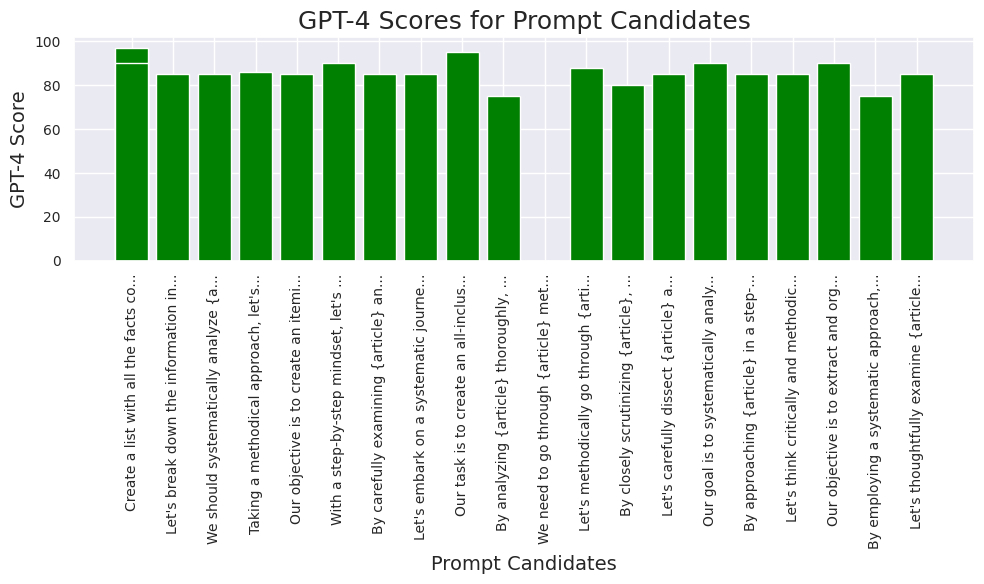

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set()

# Define the maximum length for truncating the bar labels
max_label_length = 35

# Truncate the bar labels if they exceed the maximum length
truncated_labels = [label[:max_label_length] + '...' if len(label) > max_label_length else label
                    for label in df_performance['prompt_candidate']]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(truncated_labels, df_performance['gpt4_score'], color='green')

# Customize the plot
plt.title('GPT-4 Scores for Prompt Candidates', fontsize=18)
plt.xlabel('Prompt Candidates', fontsize=14)
plt.ylabel('GPT-4 Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
# Remove the spines
# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# drop the row 17 because the output is actually 0
df_performance = df_performance.drop(17)

,prompt_candidate,gpt4_score,gpt4_performance_note,approach
0,Create a list with all the facts contained in ...,95,The provided answer accurately captures most ...,Zero-Shot
1,Create a list with all the facts contained in ...,97,The provided answer excellently captures the ...,Zero-Shot
2,Create a list with all the facts contained in ...,85,The given answer captures most of the facts a...,Zero-Shot
3,Create a list with all the facts contained in ...,88,The provided summary captures most of the key...,Zero-Shot
4,Create a list with all the facts contained in ...,85,The provided answer captures most of the key ...,Zero-Shot
5,Create a list with all the facts contained in ...,90,The provided answer covers most of the facts ...,Zero-Shot
6,Let's break down the information in this artic...,85,The provided summary captures many important ...,Zero-Shot
7,We should systematically analyze {article} and...,85,The answer captures most of the facts mention...,Zero-Shot
8,"Taking a methodical approach, let's extract an...",86,The summary captures many key facts but omits...,Zero-Shot
9,Our objective is to create an itemized compila...,85,The answer captures most of the facts describ...,Zero-Shot


In [ ]:
# Reset the index of the dataframe
df_performance = df_performance.reset_index(drop=True)
df_performance

,prompt_candidate,gpt4_score,gpt4_performance_note,approach
0,Create a list with all the facts contained in ...,95,The provided answer accurately captures most ...,Zero-Shot
1,Create a list with all the facts contained in ...,97,The provided answer excellently captures the ...,Zero-Shot
2,Create a list with all the facts contained in ...,85,The given answer captures most of the facts a...,Zero-Shot
3,Create a list with all the facts contained in ...,88,The provided summary captures most of the key...,Zero-Shot
4,Create a list with all the facts contained in ...,85,The provided answer captures most of the key ...,Zero-Shot
5,Create a list with all the facts contained in ...,90,The provided answer covers most of the facts ...,Zero-Shot
6,Let's break down the information in this artic...,85,The provided summary captures many important ...,Zero-Shot
7,We should systematically analyze {article} and...,85,The answer captures most of the facts mention...,Zero-Shot
8,"Taking a methodical approach, let's extract an...",86,The summary captures many key facts but omits...,Zero-Shot
9,Our objective is to create an itemized compila...,85,The answer captures most of the facts describ...,Zero-Shot


In [ ]:
df_performance.loc[df_performance['gpt4_score'].idxmax()]

prompt_candidate         Create a list with all the facts contained in ...
gpt4_score                                                              97
gpt4_performance_note     The provided answer excellently captures the ...
approach                                                         Zero-Shot
Name: 1, dtype: object

In [ ]:
best_prompt_candidate = df_performance.loc[df_performance['gpt4_score'].idxmax()]["prompt_candidate"]
best_prompt_candidate

"Create a list with all the facts contained in this article: {article}. Let's think step by step."

In [ ]:
prompt_template_facts = PromptTemplate(input_variables=["article"],template=best_prompt_candidate)
prompt_template_anki_flashcards = PromptTemplate(input_variables=["facts_list"], template="Create an anki flashcard for each of the following factual bullet points: {facts_list}. Let's think step by step.")

In [ ]:
# Let's now run the entire thing as a sequence of chains with LangChain
chain_facts = LLMChain(llm=llm, prompt=prompt_template_facts)
chain_anki_flashcards = LLMChain(llm=llm, prompt=prompt_template_anki_flashcards)
overall_chain = SimpleSequentialChain(chains=[chain_facts, chain_anki_flashcards], verbose=True)

In [ ]:
# Run the chain
anki_flashcards = overall_chain.run(google_palm_article)
anki_flashcards



> Entering new SimpleSequentialChain chain...


1. Google has been at the forefront of the biggest breakthroughs in AI over the last decade.
2. Neural networks can be scaled up to unlock surprising and delightful capabilities.
3. Research creativity is key to building great models.
4. Advances in how models are architected and trained have taught us how to unlock multimodality, the importance of having human feedback in the loop, and how to build models more efficiently.
5. Introducing PaLM 2, a state-of-the-art language model with improved multilingual, reasoning and coding capabilities.
6. PaLM 2 is more heavily trained on multilingual text, spanning more than 100 languages.
7. PaLM 2's wide-ranging dataset includes scientific papers and web pages that contain mathematical expressions.
8. PaLM 2 was pre-trained on a large quantity of publicly available source code datasets.
9. PaLM 2 is faster and more efficient than previous models and comes in a variety of sizes.
10. PaLM 2 is po

"\n\n1. Flashcard Question: What has Google been at the forefront of in the last decade?\nFlashcard Answer: Google has been at the forefront of the biggest breakthroughs in AI over the last decade.\n\n2. Flashcard Question: What can neural networks do?\nFlashcard Answer: Neural networks can be scaled up to unlock surprising and delightful capabilities.\n\n3. Flashcard Question: What is key to building great models?\nFlashcard Answer: Research creativity is key to building great models.\n\n4. Flashcard Question: What have advances in how models are architected and trained taught us?\nFlashcard Answer: Advances in how models are architected and trained have taught us how to unlock multimodality, the importance of having human feedback in the loop, and how to build models more efficiently.\n\n5. Flashcard Question: What is PaLM 2?\nFlashcard Answer: PaLM 2 is a state-of-the-art language model with improved multilingual, reasoning and coding capabilities.\n\n6. Flashcard Question: What doe